In [37]:
!pip install -q transformers

In [38]:
!pip install -q youtube_transcript_api

In [39]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [40]:
youtube_video = "https://youtu.be/nznFtfgP2ks?si=M5OHTdIif7JHr8uL"

In [41]:
def get_video_id(url):
    if "youtu.be" in url:
        return url.split("/")[-1].split("?")[0]
    elif "youtube.com" in url:
        return url.split("v=")[-1].split("&")[0]
    else:
        return None


video_id = get_video_id(youtube_video)


In [42]:
video_id

'nznFtfgP2ks'

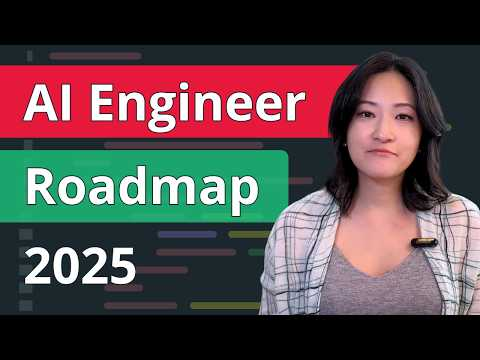

In [43]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [44]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [45]:
transcript[0:5]

[{'text': "if you're looking to break into AI",
  'start': 0.16,
  'duration': 3.279},
 {'text': "efficiently you're in the right place in",
  'start': 1.76,
  'duration': 3.12},
 {'text': "this video I'm going to show you how to",
  'start': 3.439,
  'duration': 4.041},
 {'text': 'self-study AI with proven road map all',
  'start': 4.88,
  'duration': 4.32},
 {'text': 'free of charge when I first started',
  'start': 7.48,
  'duration': 3.8}]

In [46]:
result = " ".join(i['text'] for i in transcript)
print(len(result))


9068


In [47]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [48]:
chunk_size = 1000
summarized_text = []

for i in range(0, len(result), chunk_size):
    chunk = result[i:i + chunk_size].strip()
    if not chunk:
        continue
    print(f"Input Text:\n{chunk}\n")

    summary = summarizer(chunk)[0]['summary_text']

    print(f"Summarized Text:\n{summary}\n")
    summarized_text.append(summary)

# Optional: Combine all summaries
# final_summary = " ".join(summarized_text)


Input Text:
if you're looking to break into AI efficiently you're in the right place in this video I'm going to show you how to self-study AI with proven road map all free of charge when I first started learning AI on my own it was really overwhelming to go through so many resources to figure out what is relevant or appropriate there are just too many options out there that's why today I'm really excited to share this road map with you and it's not just a random plan that I put together it's a structured stepbystep guide based on a proven curriculum from one of the best AI programs in the world the Stanford AI graduate certificate program everyone knows that Stanford is top tier but it's also one of the most expensive options out there tuition alone costs around $19,000 to $24,000 and that's a huge investment that not everyone can afford but lucky for you I'll show you how you can follow the same exact path without spending a dime I've put together a 15-page road map that contains all 

Your max_length is set to 142, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Summarized Text:
 In the PDF road map you'll find more details on each topic along with free resources for learning . Many of Stanford's Advanced courses are available entirely for free online either through YouTube or the Stamford website itself . Even if you master all the topics that I just mentioned there is still one big key missing .

Input Text:
ise YouTube thinks you should watch this one next I'll see you there

Summarized Text:
 YouTube thinks you should watch this one next I'll see you there. ise YouTube thinks it's a good idea to watch this video. I'll be back in touch with you next week to check out the rest of the world's favorite YouTube video . I'll also see you next in the world.



In [49]:
str(summarized_text)

'[" If you\'re looking to break into AI efficiently you\'re in the right place in this video I\'m going to show you how to self-study AI with proven road map all free of charge . Stanford AI graduate certificate program costs around $19,000 to $24,000 .", " ources that you\'re going to need to master AI now if you want just the road map you can download it from the link in the description . I\'ll share my personal tips on how to get the most out of the guide . I\'m not going to be offering any magic shortcut the reality is that most students even at Stanford take about one to two years studying parttime .", " You need to lay a strong foundation in math is a crucial step in AI especially in machine learning . If you\'re already comfortable with basic math and programming you can jump ahead to phase three where we dive deeper into AI fundamentals . Remember that this is not a Race so focus on understanding and really learning the material so you can set yourself up for success .", " Stan